In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
import xgboost as xgb
from xgboost import plot_importance
# from imblearn.over_sampling import SMOTE

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
os.listdir('../CICIDS')
os.listdir('../Sample data')

['CICIDS2017_sample.csv', 'CICIDS2017_sample_km.csv', 'README.md']

In [3]:
raw_df = pd.read_csv('../CICIDS/combinedCICIDS2017.csv')

In [4]:
raw_df.shape

(2830743, 79)

In [5]:
raw_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,1

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [7]:
os.listdir('../CICIDS/MachineLearningCVE')

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [8]:
df_faddos = pd.read_csv('../CICIDS/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [9]:
#Understanding which columns are missing in either csv

missing_in_raw_df = set(df_faddos.columns) - set(raw_df.columns)
missing_in_faddos = set(raw_df.columns) - set(df_faddos.columns)

print("Missing columns in raw_df:", missing_in_raw_df)
print("Missing columns in faddos:", missing_in_faddos)


Missing columns in raw_df: {' Avg Fwd Segment Size', ' Active Max', ' min_seg_size_forward', ' Flow Duration', ' Destination Port', ' Bwd Packet Length Min', ' Fwd Packet Length Std', ' Fwd Packet Length Mean', ' Fwd URG Flags', ' Bwd IAT Min', ' URG Flag Count', ' CWE Flag Count', ' Flow IAT Mean', ' PSH Flag Count', ' Flow IAT Std', ' Max Packet Length', ' Fwd Packet Length Min', ' Flow IAT Max', ' Flow IAT Min', ' Flow Packets/s', ' Active Std', ' act_data_pkt_fwd', ' Bwd URG Flags', ' Fwd Header Length.1', ' Idle Std', ' Fwd IAT Std', ' Bwd Packets/s', ' Bwd Avg Packets/Bulk', ' Subflow Bwd Bytes', ' Fwd Packet Length Max', ' RST Flag Count', ' Bwd Avg Bytes/Bulk', ' Idle Min', ' Bwd IAT Max', ' Bwd IAT Std', ' Total Length of Bwd Packets', ' Fwd IAT Max', ' Total Fwd Packets', ' Packet Length Std', ' Packet Length Variance', ' Active Min', ' Bwd Packet Length Mean', ' ECE Flag Count', ' Subflow Bwd Packets', ' SYN Flag Count', ' Average Packet Size', ' Subflow Fwd Bytes', ' Fwd Av

In [10]:
df_faps = pd.read_csv('../CICIDS/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [11]:
#Understanding which columns are missing in either csv

missing_in_raw_df = set(df_faps.columns) - set(raw_df.columns)
missing_in_faps = set(raw_df.columns) - set(df_faps.columns)

print("Missing columns in raw_df:", missing_in_raw_df)
print("Missing columns in faps:", missing_in_faps)


Missing columns in raw_df: {' Avg Fwd Segment Size', ' Active Max', ' min_seg_size_forward', ' Flow Duration', ' Destination Port', ' Bwd Packet Length Min', ' Fwd Packet Length Std', ' Fwd Packet Length Mean', ' Fwd URG Flags', ' Bwd IAT Min', ' URG Flag Count', ' CWE Flag Count', ' Flow IAT Mean', ' PSH Flag Count', ' Flow IAT Std', ' Max Packet Length', ' Fwd Packet Length Min', ' Flow IAT Max', ' Flow IAT Min', ' Flow Packets/s', ' Active Std', ' act_data_pkt_fwd', ' Bwd URG Flags', ' Fwd Header Length.1', ' Idle Std', ' Fwd IAT Std', ' Bwd Packets/s', ' Bwd Avg Packets/Bulk', ' Subflow Bwd Bytes', ' Fwd Packet Length Max', ' RST Flag Count', ' Bwd Avg Bytes/Bulk', ' Idle Min', ' Bwd IAT Max', ' Bwd IAT Std', ' Total Length of Bwd Packets', ' Fwd IAT Max', ' Total Fwd Packets', ' Packet Length Std', ' Packet Length Variance', ' Active Min', ' Bwd Packet Length Mean', ' ECE Flag Count', ' Subflow Bwd Packets', ' SYN Flag Count', ' Average Packet Size', ' Subflow Fwd Bytes', ' Fwd Av

In [12]:
#Understanding which columns are missing in either csv

missing_in_faps = set(df_faddos.columns) - set(df_faps.columns)
missing_in_faddos = set(df_faps.columns) - set(df_faddos.columns)

print("Missing columns in faps:", missing_in_faps)
print("Missing columns in faddos:", missing_in_faddos)


Missing columns in faps: set()
Missing columns in faddos: set()




Columns in attack-specific CSVs have space at beginning of columns



In [13]:
# df_faddos.columns = df_faddos.columns.str.lstrip()

In [14]:
# missing_in_raw_df = set(df_faddos.columns) - set(raw_df.columns)
# missing_in_faddos = set(raw_df.columns) - set(df_faddos.columns)

# print("Missing columns in raw_df:", missing_in_raw_df)
# print("Missing columns in faddos:", missing_in_faddos)


In [15]:
raw_df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [16]:
# df_fm = pd.read_csv('CICIDS/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
# df_m = pd.read_csv('CICIDS/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
# df_thai = pd.read_csv('CICIDS/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
# df_thmw = pd.read_csv('CICIDS/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# df_t = pd.read_csv('CICIDS/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
# df_w = pd.read_csv('CICIDS/MachineLearningCVE/Wednesday-WorkingHours.pcap_ISCX.csv')

In [17]:
unique_counts = raw_df.nunique().sort_values(ascending=False)

# Print the number of unique values for each column
print(unique_counts)

Flow Bytes/s                   1593908
Flow Packets/s                 1240164
Fwd Packets/s                  1220423
Flow IAT Mean                  1166311
Bwd Packets/s                  1107886
Flow IAT Std                   1056642
Flow Duration                  1050899
Fwd IAT Mean                    737737
Bwd IAT Std                     709042
Fwd IAT Std                     700313
Bwd IAT Mean                    670824
Flow IAT Max                    580289
Fwd IAT Total                   493098
Fwd IAT Max                     437316
Bwd IAT Total                   414928
Packet Length Std               412246
Packet Length Variance          405565
Bwd IAT Max                     368285
Active Mean                     326325
Active Max                      299565
Fwd Packet Length Std           253909
Bwd Packet Length Std           248869
Idle Min                        223888
Idle Mean                       222016
Packet Length Mean              215826
Average Packet Size      

In [18]:
raw_df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [19]:
raw_df['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [104]:
minority_classes = raw_df['Label'].value_counts()[lambda x: x < 1000].index.tolist()
minority_classes


['Web Attack � XSS',
 'Infiltration',
 'Web Attack � Sql Injection',
 'Heartbleed']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, val = train_test_split(raw_df, test_size=0.2, random_state=42)

------------------------------------------------------------------------

CLEANING UP DATA

------------------------------------------------------------------------

In [22]:
# train.isna().sum().sort_values(ascending=False)

# DO FOR VAL SPLIT AS WELL

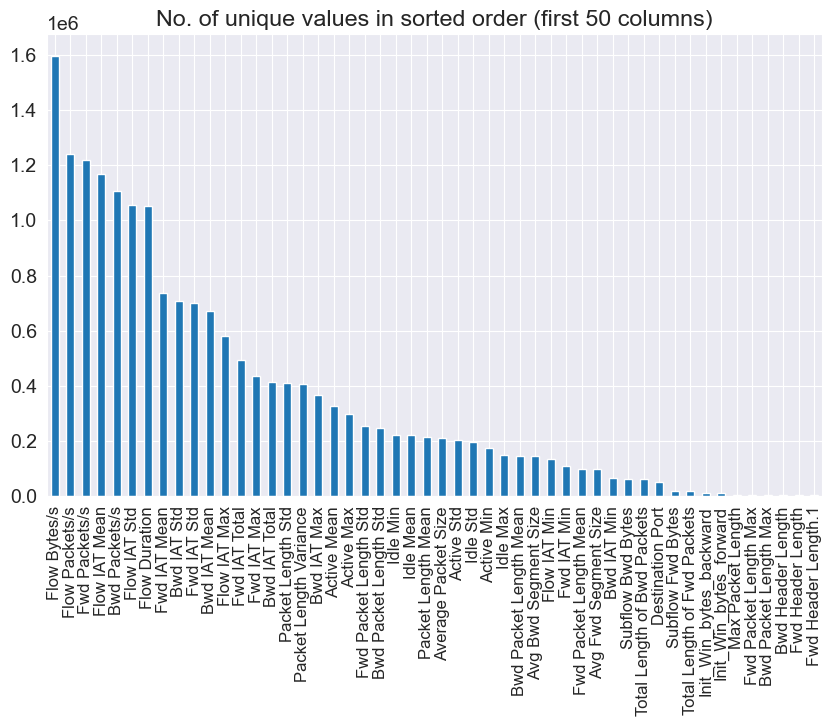

In [23]:
plt.title("No. of unique values in sorted order (first 50 columns)")
plt.xticks(rotation=90,fontsize=12)
unique_counts.iloc[:50].plot(kind='bar');

In [24]:
input_cols = list(train.columns)[:-1]
target_col = 'Label'

In [25]:
print(input_cols)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [26]:
train_inputs = train[input_cols].copy()
train_targets = train[target_col].copy()

In [ ]:
# sampling_strategy = {cls: 1000 for cls in minority_classes}

In [ ]:
# smote = SMOTE(n_jobs=-1, sampling_strategy=sampling_strategy, random_state=42)
# train_inputs, train_targets = smote.fit_resample(train_inputs, train_targets)

NameError: name 'SMOTE' is not defined

In [27]:
val_inputs = val[input_cols].copy()
val_targets = val[target_col].copy()

In [28]:
train_inputs.select_dtypes(include=np.number).columns.tolist()

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'UR

In [29]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264594 entries, 520849 to 2219110
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

78 numerical columns - All columns in train_inputs are numerical

Label is only categorical column in raw_df

In [30]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [31]:
train_inputs

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
520849,80,84918108,10,9,60,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,7.065631e-01,0.223745,4717672.667,4.981461e+06,10000000,23552,84900000,9.435345e+06,1.780366e+06,10000000,4687715,80200000,10000000.0,4.433143e+03,10000000,10000000,0,0,0,0,200,288,0.117761,0.105984,0,6,3.300000,3.062507,9.378947e+00,0,0,0,0,1,0,0,0,0,3.473684,6.000000,0.000000,200,0,0,0,0,0,0,10,60,9,0,253,296,9,20,23829.5,452.434999,24928,23552,10000000.0,4392.518052,10000000,10000000
511915,41850,66,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,30303.030300,66.000,0.000000e+00,66,66,0,0.000000e+00,0.000000e+00,0,0,0,0.0,0.000000e+00,0,0,0,0,0,0,32,32,15151.515150,15151.515150,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,391,3171,0,32,0.0,0.000000,0,0,0.0,0.000000,0,0
761641,443,5705862,7,4,617,164,517,0,88.142857,189.988972,152,0,41.000000,74.054034,1.368768e+02,1.927842,570586.200,1.769469e+06,5606303,3,5705862,9.509770e+05,2.309543e+06,5665270,3,79827,26609.0,3.012986e+04,59542,428,0,0,0,0,160,92,1.226808,0.701033,0,517,65.083333,148.723330,2.211863e+04,0,0,0,1,0,0,0,0,0,71.000000,88.142857,41.000000,160,0,0,0,0,0,0,7,617,4,164,29200,30,6,20,99556.0,0.000000,99556,99556,5606303.0,0.000000,5606303,5606303
2224246,80,98326768,5,7,391,11595,379,0,78.200000,168.179071,7240,0,1656.428571,2566.885263,1.218997e+02,0.122042,8938797.091,2.960000e+07,98300000,5,98300000,2.460000e+07,4.910000e+07,98300000,5,98300000,16400000.0,4.010000e+07,98300000,45,0,0,0,0,144,232,0.050851,0.071191,0,7240,922.461538,1996.273178,3.985107e+06,1,0,0,0,0,0,0,0,1,999.333333,78.200000,1656.428571,144,0,0,0,0,0,0,5,391,7,11595,0,235,2,20,11005.0,0.000000,11005,11005,98300000.0,0.000000,98300000,98300000
2824328,53,204,2,2,88,188,44,44,44.000000,0.000000,94,94,94.000000,0.000000,1.352941e+06,19607.843140,68.000,3.377869e+01,107,48,49,4.900000e+01,0.000000e+00,49,49,48,48.0,0.000000e+00,48,48,0,0,0,0,40,40,9803.921569,9803.921569,44,94,64.000000,27.386128,7.500000e+02,0,0,0,0,0,0,0,0,1,80.000000,44.000000,94.000000,40,0,0,0,0,0,0,2,88,2,188,-1,-1,1,20,0.0,0.000000,0,0,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,80,35439,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,56.435001,35439.000,0.000000e+00,35439,35439,35439,3.543900e+04,0.000000e+00,35439,35439,0,0.0,0.000000e+00,0,0,0,0,0,0,40,0,56.435001,0.000000,0,0,0.000000

In [32]:
print(train_inputs[numeric_cols].isna().sum().sort_values(ascending=False))
print(val_inputs[numeric_cols].isna().sum().sort_values(ascending=False))

Flow Bytes/s                   1072
Destination Port                  0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Flow Duration                     0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Total Length of Bwd Packets       0
Bwd Packet Length Std             0
Flow Packets/s                    0
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

In [33]:
np.isinf(train_inputs).sum().sort_values(ascending=False)

Flow Packets/s                 2276
Flow Bytes/s                   1204
Total Fwd Packets                 0
Total Backward Packets            0
Destination Port                  0
Flow Duration                     0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Bwd Packet Length Std             0
Bwd Packet Length Mean            0
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                      0
Fwd IAT Std                       0
Fwd IAT Max                       0
Fwd IAT Min                       0
Bwd IAT Total                     0
Bwd IAT Mean                      0
Bwd IAT Std                 

In [34]:
np.isinf(val_inputs).sum().sort_values(ascending=False)

Flow Packets/s                 591
Flow Bytes/s                   305
Total Fwd Packets                0
Total Backward Packets           0
Destination Port                 0
Flow Duration                    0
Fwd Packet Length Max            0
Fwd Packet Length Min            0
Fwd Packet Length Mean           0
Fwd Packet Length Std            0
Bwd Packet Length Max            0
Bwd Packet Length Min            0
Total Length of Fwd Packets      0
Total Length of Bwd Packets      0
Bwd Packet Length Std            0
Bwd Packet Length Mean           0
Flow IAT Mean                    0
Flow IAT Std                     0
Flow IAT Max                     0
Flow IAT Min                     0
Fwd IAT Total                    0
Fwd IAT Mean                     0
Fwd IAT Std                      0
Fwd IAT Max                      0
Fwd IAT Min                      0
Bwd IAT Total                    0
Bwd IAT Mean                     0
Bwd IAT Std                      0
Bwd IAT Max         

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
train_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
val_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [38]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [39]:
train_inputs

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
520849,80.0,84918108.0,10.0,9.0,60.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,7.065631e-01,0.223745,4717672.667,4.981461e+06,10000000.0,23552.0,84900000.0,9.435345e+06,1.780366e+06,10000000.0,4687715.0,80200000.0,10000000.0,4.433143e+03,10000000.0,10000000.0,0.0,0.0,0.0,0.0,200.0,288.0,0.117761,0.105984,0.0,6.0,3.300000,3.062507,9.378947e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.473684,6.000000,0.000000,200.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,60.0,9.0,0.0,253.0,296.0,9.0,20.0,23829.5,452.434999,24928.0,23552.0,10000000.0,4392.518052,10000000.0,10000000.0
511915,41850.0,66.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,30303.030300,66.000,0.000000e+00,66.0,66.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,15151.515150,15151.515150,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,391.0,3171.0,0.0,32.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
761641,443.0,5705862.0,7.0,4.0,617.0,164.0,517.0,0.0,88.142857,189.988972,152.0,0.0,41.000000,74.054034,1.368768e+02,1.927842,570586.200,1.769469e+06,5606303.0,3.0,5705862.0,9.509770e+05,2.309543e+06,5665270.0,3.0,79827.0,26609.0,3.012986e+04,59542.0,428.0,0.0,0.0,0.0,0.0,160.0,92.0,1.226808,0.701033,0.0,517.0,65.083333,148.723330,2.211863e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,71.000000,88.142857,41.000000,160.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,617.0,4.0,164.0,29200.0,30.0,6.0,20.0,99556.0,0.000000,99556.0,99556.0,5606303.0,0.000000,5606303.0,5606303.0
2224246,80.0,98326768.0,5.0,7.0,391.0,11595.0,379.0,0.0,78.200000,168.179071,7240.0,0.0,1656.428571,2566.885263,1.218997e+02,0.122042,8938797.091,2.960000e+07,98300000.0,5.0,98300000.0,2.460000e+07,4.910000e+07,98300000.0,5.0,98300000.0,16400000.0,4.010000e+07,98300000.0,45.0,0.0,0.0,0.0,0.0,144.0,232.0,0.050851,0.071191,0.0,7240.0,922.461538,1996.273178,3.985107e+06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.333333,78.200000,1656.428571,144.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,391.0,7.0,11595.0,0.0,235.0,2.0,20.0,11005.0,0.000000,11005.0,11005.0,98300000.0,0.000000,98300000.0,98300000.0
2824328,53.0,204.0,2.0,2.0,88.0,188.0,44.0,44.0,44.000000,0.000000,94.0,94.0,94.000000,0.000000,1.352941e+06,19607.843140,68.000,3.377869e+01,107.0,48.0,49.0,4.900000e+01,0.000000e+00,49.0,49.0,48.0,48.0,0.000000e+00,48.0,48.0,0.0,0.0,0.0,0.0,40.0,40.0,9803.921569,9803.921569,44.0,94.0,64.000000,27.386128,7.500000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.000000,44.000000,94.000000,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,88.0,2.0,188.0,-1.0,-1.0,1.0,20.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,..

In [40]:
np.isinf(train_inputs).sum().sort_values(ascending=False)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

### Scaling Numeric Features

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [43]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [44]:
train_inputs.describe().loc[['min', 'max']]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
min,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,0.222179,1.0,1.0,1.0,1.0,0.989316,0.889708,1.0,1.0,1.0,1.0,1.0,1.0,0.999997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.875,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.946233,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.222691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.950135,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]

In [46]:
X_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
520849,0.001221,7.076509e-01,0.000041,0.000031,0.000005,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,0.000000,0.000000,0.000000,0.111921,0.333333,3.931404e-02,5.874346e-02,8.333343e-02,1.963833e-04,7.075000e-01,7.862788e-02,0.021044,8.333333e-02,3.906439e-02,6.683333e-01,8.333333e-02,0.000053,8.333333e-02,8.333333e-02,0.0,0.0,0.0,0.0,0.999856,0.994592,3.925350e-08,5.299223e-08,0.000000,0.000242,0.000989,0.000647,4.187030e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000892,0.001010,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000041,0.000005,0.000031,0.000000e+00,0.003876,0.004532,0.000042,1.0,0.000217,0.000006,0.000227,0.000214,0.083333,0.000057,0.083333,0.083333
511915,0.638590,6.583333e-07,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111921,0.338384,6.583333e-07,0.000000e+00,6.583333e-07,6.666666e-07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.999999e-08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.999856,0.994592,5.050505e-03,7.575758e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.006410,0.000000,0.000000,0.000000,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000e+00,0.005981,0.048401,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
761641,0.006760,4.754895e-02,0.000027,0.000014,0.000048,2.502086e-07,0.020830,0.000000,0.014837,0.026663,0.007783,0.000000,0.007068,0.009037,0.111921,0.333334,4.754993e-03,2.086632e-02,4.671929e-02,1.416667e-07,4.754885e-02,7.924808e-03,0.027299,4.721058e-02,1.250000e-07,6.652250e-04,2.217417e-04,0.000357,4.961833e-04,3.566667e-06,0.0,0.0,0.0,0.0,0.999856,0.994592,4.089362e-07,3.505167e-07,0.000000,0.020830,0.019503,0.031432,9.874388e-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.018236,0.014837,0.007068,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000027,0.000048,0.000014,2.502086e-07,0.445572,0.000473,0.000028,1.0,0.000905,0.000000,0.000905,0.000905,0.046719,0.000000,0.046719,0.046719
2224246,0.001221,8.193898e-01,0.000018,0.000024,0.000030,1.769005e-05,0.015270,0.000000,0.013163,0.023602,0.370712,0.000000,0.285567,0.313239,0.111921,0.333333,7.449008e-02,3.490555e-01,8.191667e-01,1.583333e-07,8.191667e-01,2.050000e-01,0.580358,8.191667e-01,1.416667e-07,8.191667e-01,1.366667e-01,0.475017,8.191667e-01,3.750000e-07,0.0,0.0,0.0,0.0,0.999856,0.994592,1.695028e-08,3.559560e-08,0.000000,0.291700,0.276423,0.421909,1.779065e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006410,0.256678,0.013163,0.285567,0.999856,0.0,0.0,0.0,0.0,0.0,0.0,0.000018,0.000030,0.000024,1.769005e-05,0.000015,0.003601,0.000009,1.0,0.000100,0.000000,0.00

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dt = DecisionTreeClassifier(random_state=42)

In [49]:
%%time
model_dt.fit(X_train, train_targets)

CPU times: total: 3min 34s
Wall time: 3min 38s


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,precision_recall_fscore_support,f1_score

In [51]:
train_preds_dt = model_dt.predict(X_train)
train_preds_dt

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'DoS Hulk', 'BENIGN',
       'DoS Hulk'], shape=(2264594,), dtype=object)

In [52]:
pd.value_counts(train_preds_dt)

C:\Users\Nick\AppData\Local\Temp\ipykernel_14404\1342914865.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds_dt)


BENIGN                        1818670
DoS Hulk                       184650
PortScan                       127152
DDoS                           102443
DoS GoldenEye                    8219
FTP-Patator                      6326
SSH-Patator                      4724
DoS slowloris                    4621
DoS Slowhttptest                 4427
Bot                              1576
Web Attack � Brute Force         1199
Web Attack � XSS                  533
Infiltration                       31
Web Attack � Sql Injection         14
Heartbleed                          9
Name: count, dtype: int64

In [53]:
accuracy_score(train_preds_dt, train_targets)

0.9997611050810874

In [54]:
train_probs_dt = model_dt.predict_proba(X_train)
train_probs_dt

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2264594, 15))

In [55]:
model_dt.score(X_val, val_targets)

0.9984703673414596

In [56]:
val_preds_dt = model_dt.predict(X_val)
val_preds_dt

array(['BENIGN', 'BENIGN', 'DoS Hulk', ..., 'BENIGN', 'BENIGN',
       'PortScan'], shape=(566149,), dtype=object)

In [57]:
from sklearn.tree import plot_tree, export_text

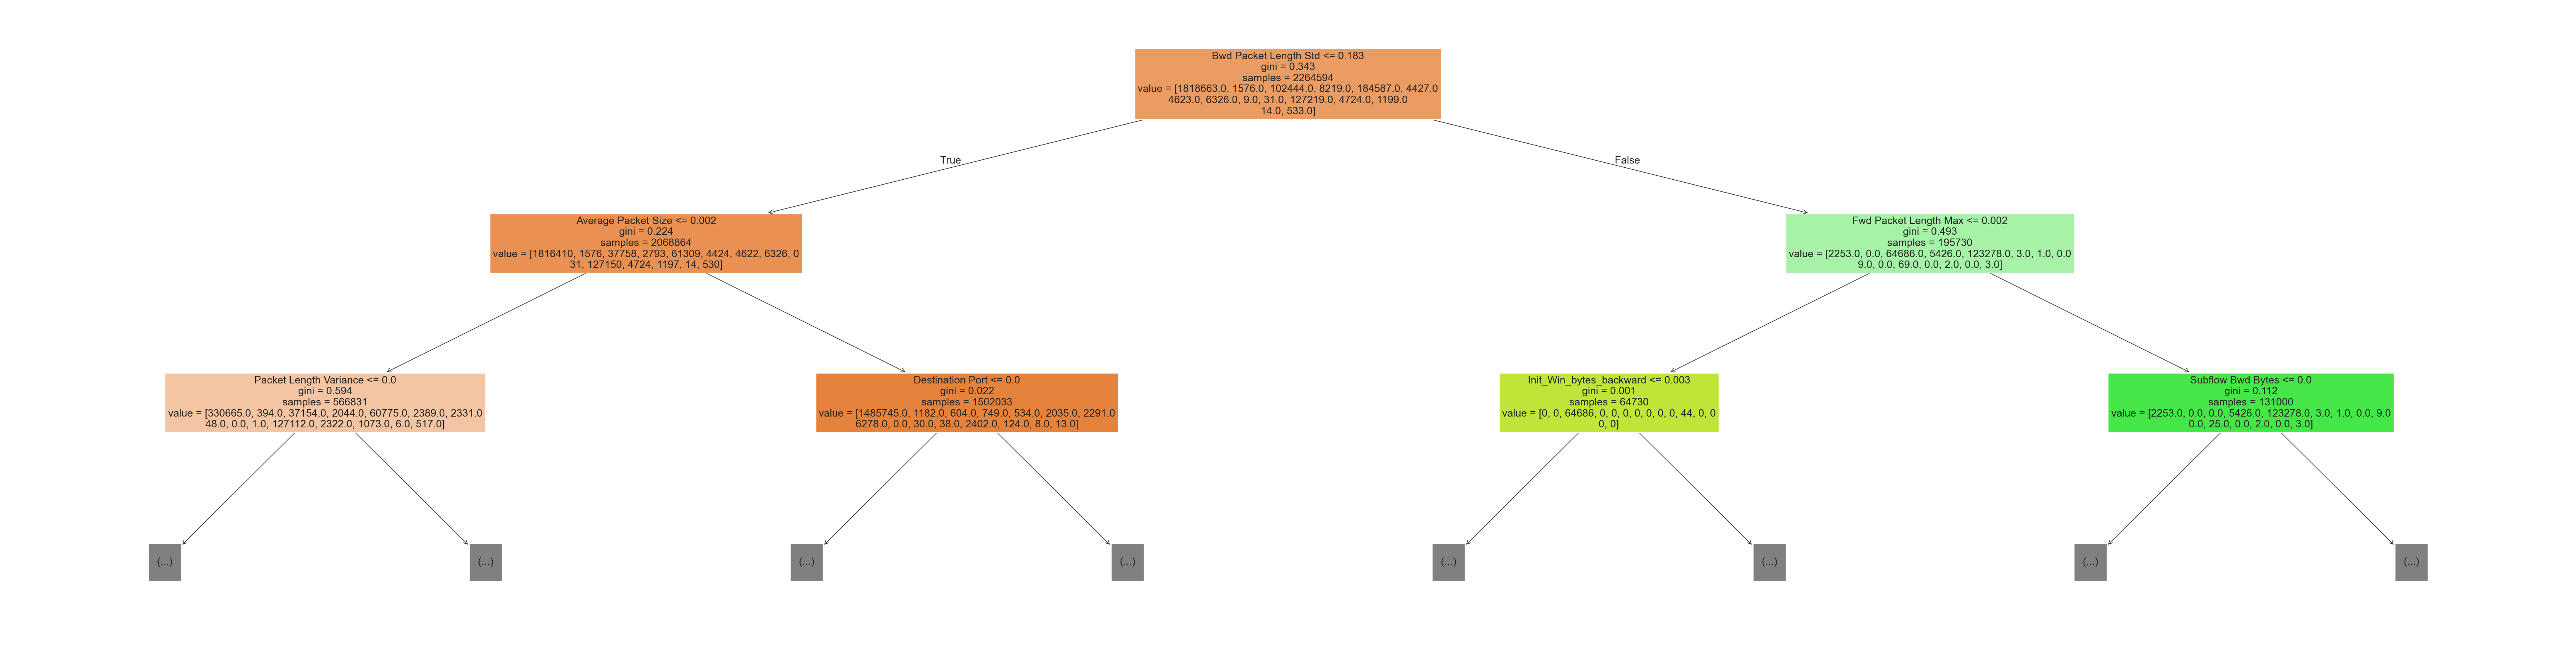

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

In [59]:
model_dt.tree_.max_depth

46

In [60]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt.feature_importances_
}).sort_values('importance', ascending=False)

In [61]:
importance_df.head(10)

,feature,importance
13,Bwd Packet Length Std,0.280104
52,Average Packet Size,0.173402
42,Packet Length Variance,0.123558
6,Fwd Packet Length Max,0.109896
0,Destination Port,0.103997
17,Flow IAT Std,0.070043
16,Flow IAT Mean,0.034072
66,Init_Win_bytes_forward,0.018221
69,min_seg_size_forward,0.011138
19,Flow IAT Min,0.010018


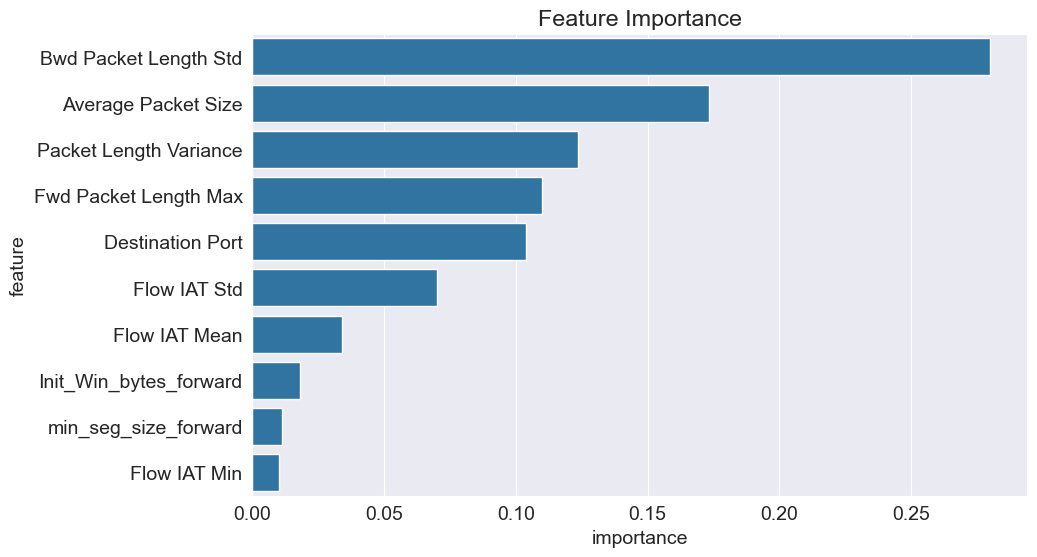

In [62]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [63]:
# def max_depth_error(md):
#     model = DecisionTreeClassifier(max_depth=md, random_state=42)
#     model.fit(X_train, train_targets)
#     train_acc = 1 - model.score(X_train, train_targets)
#     val_acc = 1 - model.score(X_val, val_targets)
#     return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [64]:
# %%time
# errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 30)])

In [65]:
# errors_df

In [66]:
# plt.figure()
# plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
# plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
# plt.title('Training vs. Validation Error')
# plt.xticks(range(0,21, 2))
# plt.xlabel('Max. Depth')
# plt.ylabel('Prediction Error (1 - Accuracy)')
# plt.legend(['Training', 'Validation'])

In [67]:
model_dt.tree_.n_leaves

np.int64(3833)

In [68]:
model_dt = DecisionTreeClassifier(max_leaf_nodes=8192, random_state=42)

In [69]:
model_dt.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,8192
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
model_dt.score(X_train, train_targets)

0.9997611050810874

In [71]:
score_dt = model_dt.score(X_val, val_targets)
score_dt

0.9984544704662554

In [72]:
val_preds_dt = model_dt.predict(X_val)
val_preds_dt

array(['BENIGN', 'BENIGN', 'DoS Hulk', ..., 'BENIGN', 'BENIGN',
       'PortScan'], shape=(566149,), dtype=object)

No change on varying characteristics of Decision tree model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model_rf = RandomForestClassifier(n_jobs = -1, random_state=42, n_estimators=100, max_features='sqrt')

In [77]:
%%time
model_rf.fit(X_train, train_targets)

CPU times: total: 28min 35s
Wall time: 2min 13s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
model_rf.score(X_train, train_targets)

0.9997611050810874

In [79]:
train_preds_rf = model_rf.predict(X_train)
train_preds_rf

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'DoS Hulk', 'BENIGN',
       'DoS Hulk'], shape=(2264594,), dtype=object)

In [80]:
score_rf = model_rf.score(X_val, val_targets)
score_rf

0.9986628961633774

In [81]:
val_preds_rf = model_rf.predict(X_val)
val_preds_rf

array(['BENIGN', 'BENIGN', 'DoS Hulk', ..., 'BENIGN', 'BENIGN',
       'PortScan'], shape=(566149,), dtype=object)

Small increase in validation score(dt - 99.84, rf - 99.86), similar training score

In [82]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

In [83]:
importance_df.head(10)

,feature,importance
42,Packet Length Variance,0.061818
41,Packet Length Std,0.057414
39,Max Packet Length,0.051372
54,Avg Bwd Segment Size,0.043865
0,Destination Port,0.043855
52,Average Packet Size,0.039738
5,Total Length of Bwd Packets,0.037231
10,Bwd Packet Length Max,0.033179
65,Subflow Bwd Bytes,0.033080
63,Subflow Fwd Bytes,0.033042


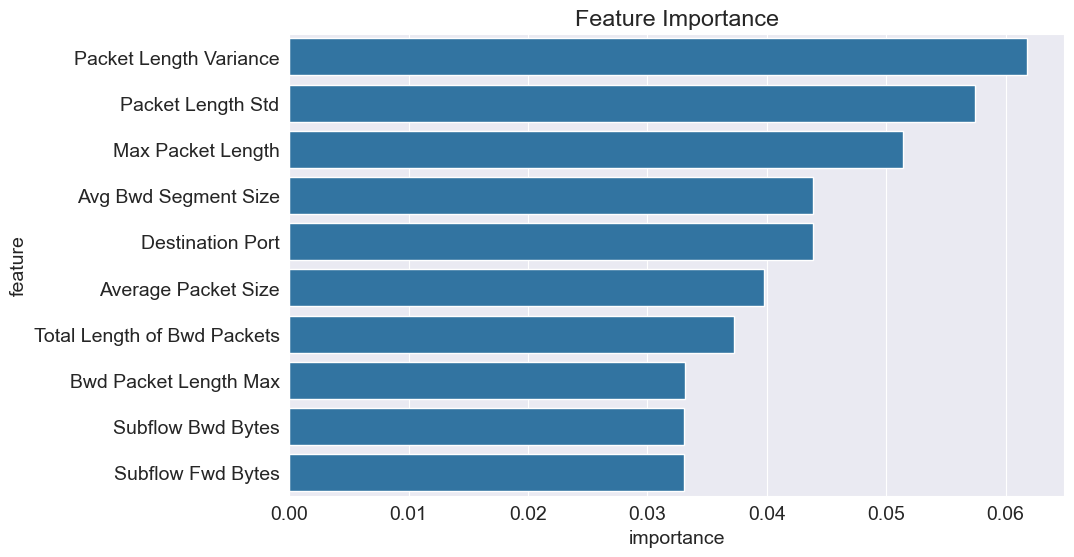

In [84]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Feature Importance is much more evenly distributed

Accuracy of DT: 0.9984544704662554
Precision of DT: 0.9984723332562749
Recall of DT: 0.9984544704662554
F1-score of DT: 0.9984613415475334
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454434
                       Bot       0.82      0.84      0.83       390
                      DDoS       1.00      1.00      1.00     25583
             DoS GoldenEye       0.99      1.00      1.00      2074
                  DoS Hulk       1.00      1.00      1.00     46486
          DoS Slowhttptest       0.98      0.99      0.99      1072
             DoS slowloris       0.99      0.99      0.99      1173
               FTP-Patator       1.00      1.00      1.00      1612
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.56      1.00      0.71         5
                  PortScan       0.99      0.99      0.99     31711
               SSH-Patator       1.00      1

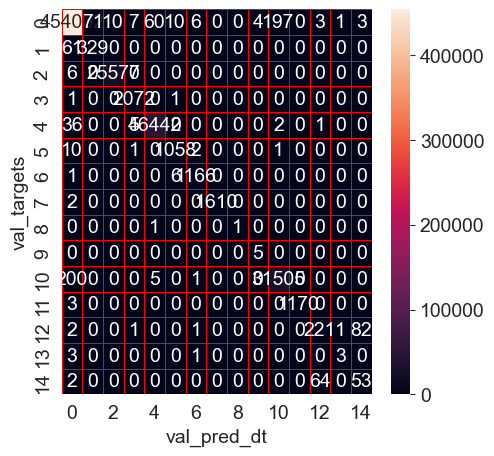

In [85]:
print('Accuracy of DT: '+ str(score_dt))
precision,recall,fscore,none= precision_recall_fscore_support(val_targets, val_preds_dt, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(val_targets,val_preds_dt))
cm=confusion_matrix(val_targets,val_preds_dt)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("val_pred_dt")
plt.ylabel("val_targets")
plt.show()

Accuracy of RF: 0.9986628961633774
Precision of DT: 0.9986350971265301
Recall of DT: 0.9986628961633774
F1-score of DT: 0.9986391860372142
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454434
                       Bot       0.90      0.77      0.83       390
                      DDoS       1.00      1.00      1.00     25583
             DoS GoldenEye       1.00      1.00      1.00      2074
                  DoS Hulk       1.00      1.00      1.00     46486
          DoS Slowhttptest       0.99      1.00      0.99      1072
             DoS slowloris       1.00      1.00      1.00      1173
               FTP-Patator       1.00      1.00      1.00      1612
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.80      0.80      0.80         5
                  PortScan       0.99      1.00      0.99     31711
               SSH-Patator       1.00      1

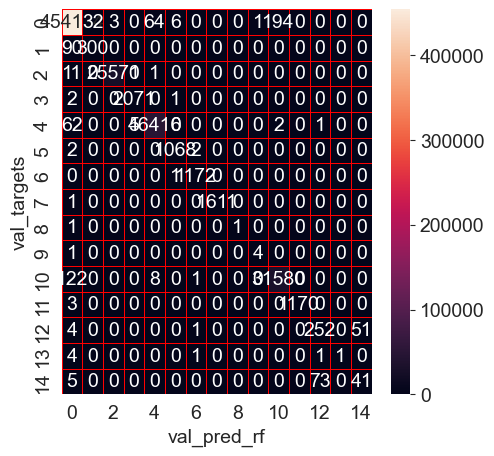

In [86]:
print('Accuracy of RF: '+ str(score_rf))
precision,recall,fscore,none= precision_recall_fscore_support(val_targets, val_preds_rf, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(val_targets,val_preds_rf))
cm=confusion_matrix(val_targets,val_preds_rf)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("val_pred_rf")
plt.ylabel("val_targets")
plt.show()

------------------------------------------------------------------------

XGBOOST


------------------------------------------------------------------------

In [91]:
train_targets.value_counts()

Label
BENIGN                        1818663
DoS Hulk                       184587
PortScan                       127219
DDoS                           102444
DoS GoldenEye                    8219
FTP-Patator                      6326
SSH-Patator                      4724
DoS slowloris                    4623
DoS Slowhttptest                 4427
Bot                              1576
Web Attack � Brute Force         1199
Web Attack � XSS                  533
Infiltration                       31
Web Attack � Sql Injection         14
Heartbleed                          9
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
labelencoder = LabelEncoder()
train_targets = labelencoder.fit_transform(train_targets)
val_targets = labelencoder.fit_transform(val_targets)

Accuracy of XGBoost: 0.9979510694181214
Precision of XGBoost: 0.9979693302845506
Recall of XGBoost: 0.9979510694181214
F1-score of XGBoost: 0.9977807264959286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454434
           1       1.00      0.39      0.57       390
           2       1.00      1.00      1.00     25583
           3       1.00      0.99      1.00      2074
           4       0.99      1.00      1.00     46486
           5       0.99      0.98      0.98      1072
           6       1.00      0.95      0.97      1173
           7       1.00      1.00      1.00      1612
           8       1.00      0.50      0.67         2
           9       0.67      0.40      0.50         5
          10       0.99      1.00      1.00     31711
          11       1.00      1.00      1.00      1173
          12       0.70      0.82      0.76       308
          13       0.00      0.00      0.00         7
          14       1.00      0

c:\Users\Nick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

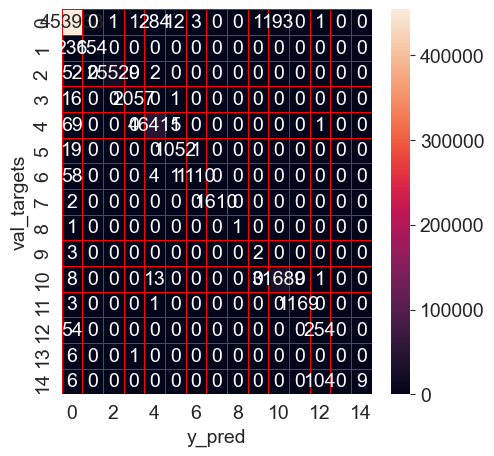

In [96]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,train_targets)
xg_score=xg.score(val_inputs,val_targets)
y_predict=xg.predict(val_inputs)
y_true=val_targets
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("val_targets")
plt.show()